# Image Classification with Convolutional Neural Network and Transfer Learning

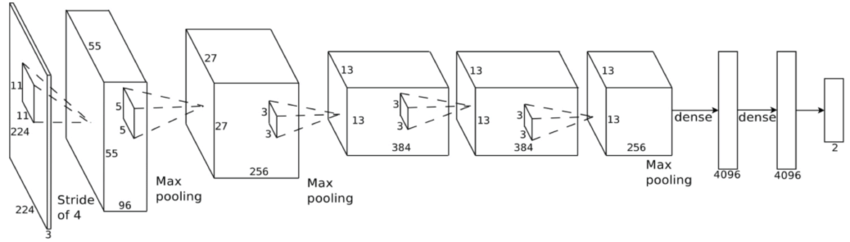

## Basic Convolutional Neural Network

### 1. Convolution Layer
The purpose of convolution layer is to convolve input tensor with a kernel (filter) followed by activation function. Initially we use a random kernel/filter, then we use optimization algorithm to adjust this kernel until specific requirement is match.

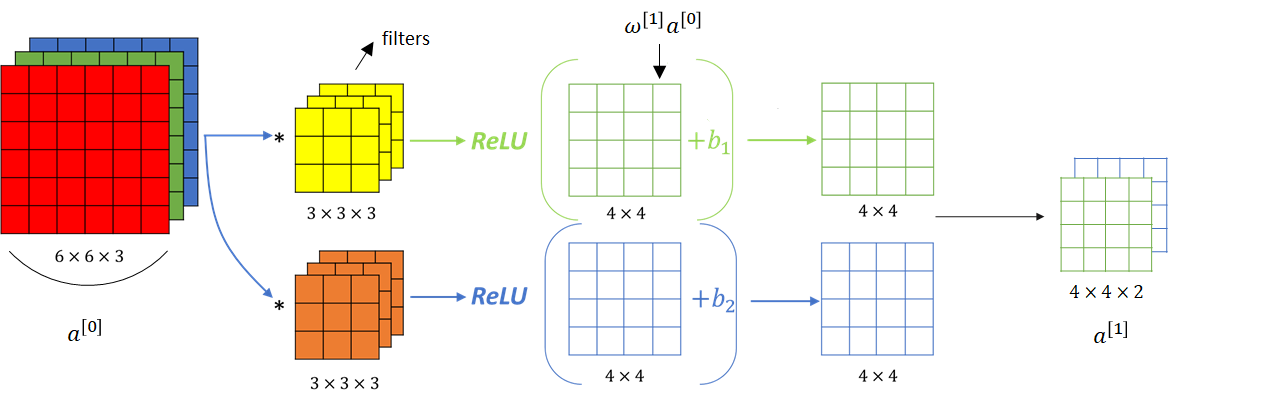

#### Activation Function
These are the common activation function used in ConvNet.
##### 1. Sigmoid
$$\sigma(x)=\frac{1}{1+e^{-x}}$$
##### 2. Tanh (Hyperbolic tangent)
$$\tanh (x)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$
##### 3. ReLU (Rectified Linear Unit)
$$\begin{array}{c}
\left\{\begin{array}{ll}
0 & \text { if } x \leq 0 \\
x & \text { if } x>0
\end{array}\right. \\
=\max \{0, x\}=x \mathbf{1}_{x>0}
\end{array}$$

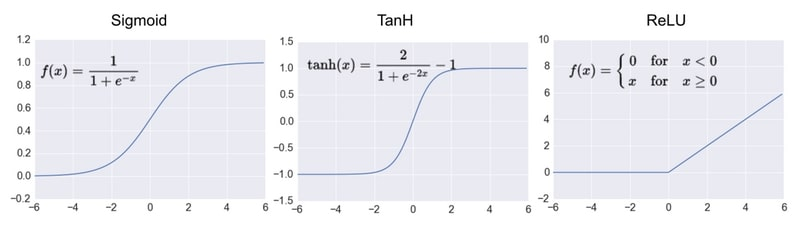

### 2. Pooling Layer
The purpose of pooling layer is to downsampling / reduce the input size.
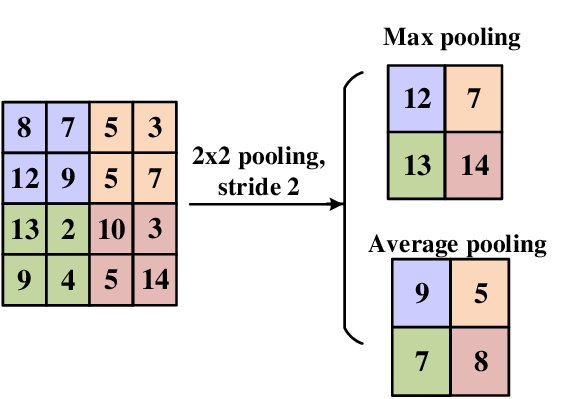
#### Pooling Operations
##### 1. Average Pooling
Calculate the average value for each input.
##### 2. Maximum Pooling (or Max Pooling)
Calculate the maximum value for each input.

### 3. Dense/Fully Connected Layer
Dense layer is a common neural network (MLP) architecture. The input is vector and output also vector.
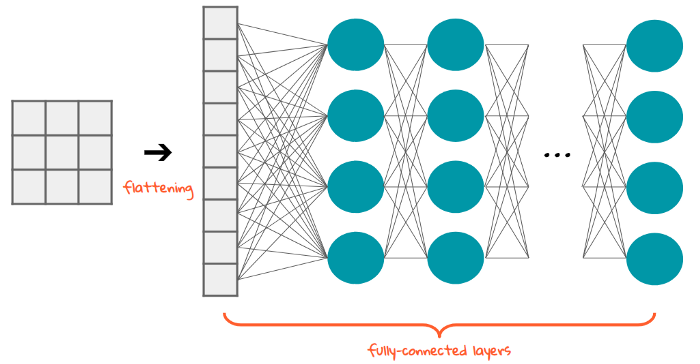

## CNN with Transfer Learning for Paddy Disease Classification

In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

### 1. Dataset Preparation

Source dataset : https://www.kaggle.com/tedisetiady/leaf-rice-disease-indonesia

#### 1.1 Create Dataset in PyTorch

In [18]:
!ls ../images/paddy-leaf-dataset/train

blast  blight  tungro


In [4]:
!ls ../images/paddy-leaf-dataset/train/blast

IMG_0448.jpg  IMG_0557.jpg  IMG_0594.jpg  IMG_0633.jpg	IMG_0675.jpg
IMG_0535.jpg  IMG_0558.jpg  IMG_0599.jpg  IMG_0635.jpg	IMG_0678.jpg
IMG_0536.jpg  IMG_0559.jpg  IMG_0602.jpg  IMG_0636.jpg	IMG_0680.jpg
IMG_0541.jpg  IMG_0560.jpg  IMG_0603.jpg  IMG_0640.jpg	IMG_0681.jpg
IMG_0543.jpg  IMG_0561.jpg  IMG_0604.jpg  IMG_0641.jpg	IMG_0682.jpg
IMG_0544.jpg  IMG_0563.jpg  IMG_0605.jpg  IMG_0647.jpg	IMG_0684.jpg
IMG_0545.jpg  IMG_0566.jpg  IMG_0607.jpg  IMG_0648.jpg	IMG_0687.jpg
IMG_0546.jpg  IMG_0567.jpg  IMG_0611.jpg  IMG_0649.jpg	IMG_0691.jpg
IMG_0547.jpg  IMG_0569.jpg  IMG_0612.jpg  IMG_0650.jpg	IMG_0692.jpg
IMG_0548.jpg  IMG_0570.jpg  IMG_0613.jpg  IMG_0651.jpg	IMG_0694.jpg
IMG_0549.jpg  IMG_0571.jpg  IMG_0622.jpg  IMG_0652.jpg	IMG_0695.jpg
IMG_0550.jpg  IMG_0572.jpg  IMG_0628.jpg  IMG_0654.jpg	IMG_0698.jpg
IMG_0551.jpg  IMG_0575.jpg  IMG_0630.jpg  IMG_0656.jpg	IMG_0701.jpg
IMG_0553.jpg  IMG_0576.jpg  IMG_0632.jpg  IMG_0674.jpg	IMG_0704.jpg


In [5]:
import cv2 as cv

In [6]:
img = cv.imread("../images/paddy-leaf-dataset/train/blast/IMG_0448.jpg")

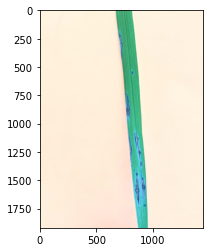

In [7]:
plt.imshow(img)

In [8]:
from torchvision import datasets, transforms

In [9]:
train_dir = "../images/paddy-leaf-dataset/train"
val_dir = "../images/paddy-leaf-dataset/val"

In [11]:
image_datasets = {}

In [12]:
image_datasets['train'] = datasets.ImageFolder(train_dir)

In [13]:
image_datasets['val'] = datasets.ImageFolder(val_dir)

In [20]:
image_datasets['train'][0]

(<PIL.Image.Image image mode=RGB size=1440x1920 at 0x7EFBFB741250>, 0)

In [21]:
image, label = image_datasets['train'][0]

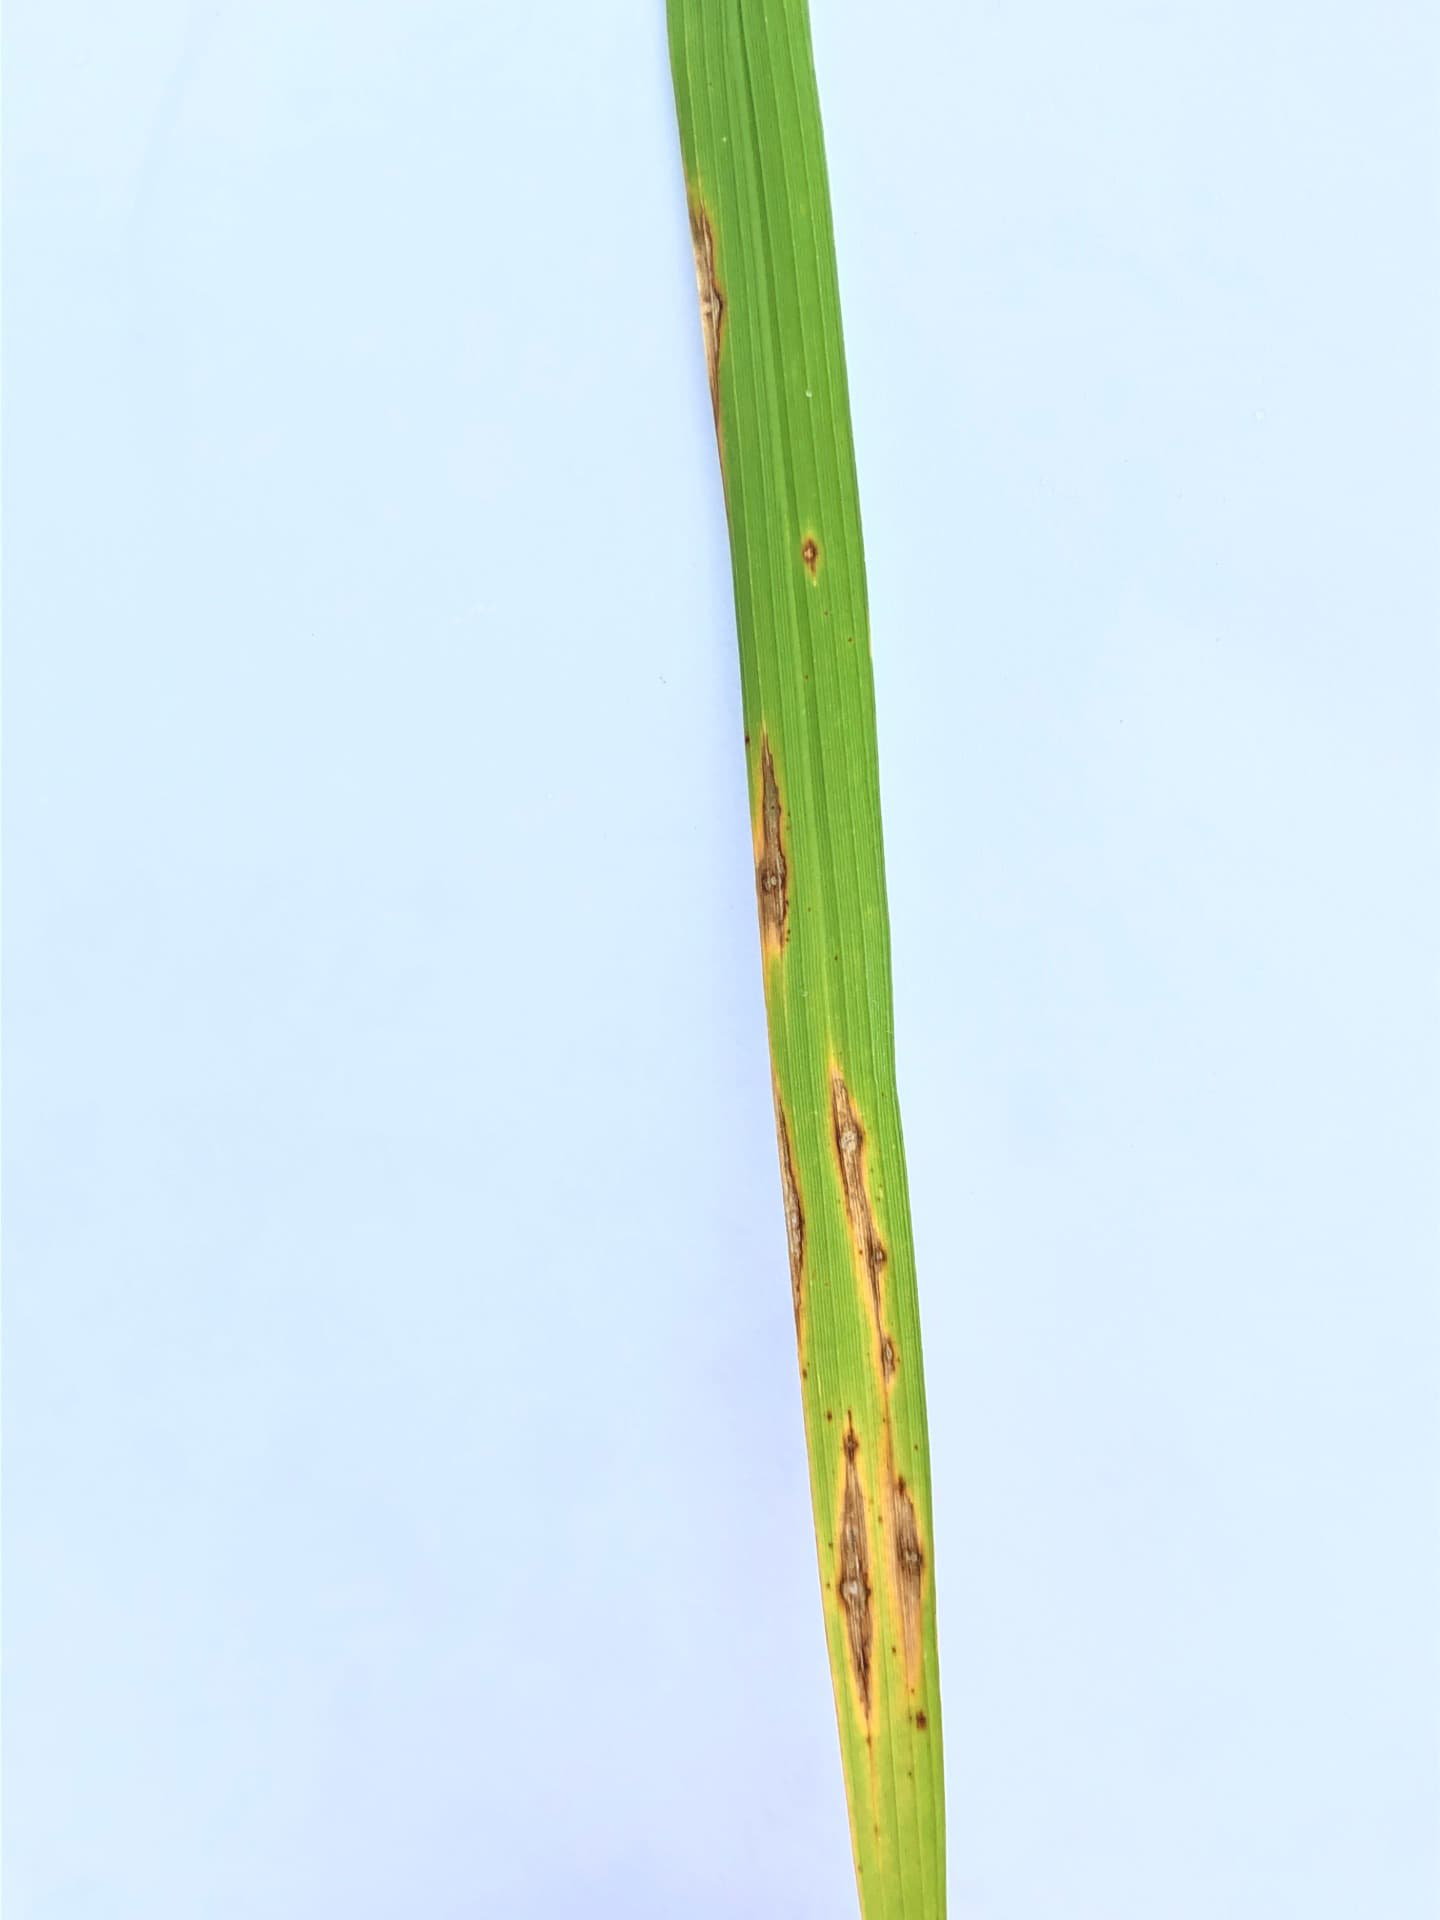

In [22]:
image

In [23]:
label

0

In [25]:
data_transforms = transforms.Compose([transforms.Resize((224, 224)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [26]:
data_transforms

Compose(
    Resize(size=(224, 224), interpolation=bilinear)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [27]:
image_datasets['train'] = datasets.ImageFolder(train_dir, transform=data_transforms)

In [28]:
image_datasets['val'] = datasets.ImageFolder(val_dir, transform=data_transforms)

In [30]:
img, label = image_datasets['train'][0]

In [33]:
img

tensor([[[1.7694, 1.7352, 1.7352,  ..., 1.7180, 1.7352, 1.7352],
         [1.7694, 1.7352, 1.7352,  ..., 1.7180, 1.7180, 1.7352],
         [1.7694, 1.7352, 1.7523,  ..., 1.7180, 1.7180, 1.7180],
         ...,
         [1.7180, 1.7009, 1.7009,  ..., 1.7180, 1.7009, 1.7180],
         [1.7352, 1.7009, 1.7009,  ..., 1.7009, 1.7180, 1.7352],
         [1.7352, 1.7009, 1.7009,  ..., 1.7009, 1.7180, 1.7352]],

        [[2.2710, 2.2185, 2.2185,  ..., 2.2010, 2.2185, 2.2185],
         [2.2710, 2.2185, 2.2185,  ..., 2.2010, 2.2010, 2.2185],
         [2.2710, 2.2185, 2.2360,  ..., 2.2010, 2.2010, 2.2010],
         ...,
         [2.2185, 2.1835, 2.1835,  ..., 2.2010, 2.1835, 2.2010],
         [2.2185, 2.1835, 2.1660,  ..., 2.1835, 2.1660, 2.1835],
         [2.2185, 2.1835, 2.1660,  ..., 2.1835, 2.1660, 2.1835]],

        [[2.6051, 2.6226, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6051, 2.6226, 2.6400,  ..., 2.6400, 2.6226, 2.6400],
         [2.6051, 2.6226, 2.6400,  ..., 2.6226, 2.6226, 2.

In [34]:
cat_dict = {0: 'blast', 1: 'blight', 2: 'tungro'}

In [35]:
def show_image(img, cat):
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.title(cat_dict[cat])
    plt.imshow(img)

In [36]:
img, label = image_datasets['train'][100]

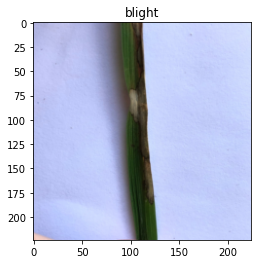

In [37]:
show_image(img, label)

## 2. Transfer Learning
We will use AlexNet architecture to recognize the leaf disease. We will use pretrained parameters and modify the output layer. Then, we train the model on the dense layer only.

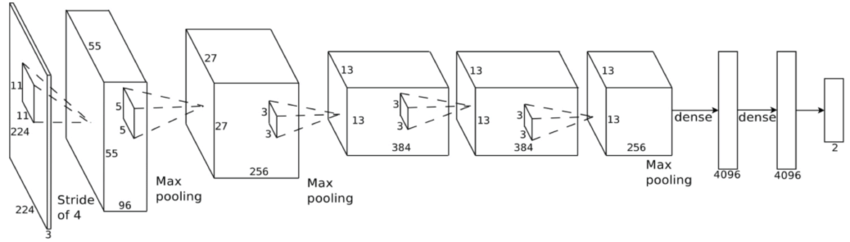

In [38]:
from torchvision import models

In [39]:
model = models.alexnet(pretrained=True)

In [40]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 2.1 Change Output Layer
We change the output layer to be 3 (same as disease category)

In [41]:
import torch.nn as nn

In [42]:
model.classifier[6] = nn.Linear(4096, 3)

In [43]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### 2.2 Freeze Some Parameters
We will freeze parameters on the convolution layer, and just train the dense layer.

In [45]:
for param in model.features.parameters():
    param.requires_grad = False

In [47]:
for param in model.classifier.parameters():
    print(param.requires_grad)

True
True
True
True
True
True


#### 2.3 Define Loss Function
Because this is multi-class classification problem, the common loss function used is Categorical Cross Entropy Loss

In [48]:
criterion = nn.CrossEntropyLoss()

#### 2.4 Define Optimizer
Here we define optimization algorithm used for training. We will use ADAM, but you can use other. We initialized the model parameter with pretrained models, so it is not initialized with random value.

In [49]:
import torch.optim as optim

In [50]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#### 2.4 Training The CNN Model

In [51]:
dataloaders = {}

In [53]:
dataloaders['train'] = torch.utils.data.DataLoader(image_datasets['train'], batch_size=4, shuffle=True, num_workers=4)

In [55]:
device = torch.device('cpu')

In [56]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [59]:
num_epoch = 10
list_loss = []
list_acc = []
for epoch in range(num_epoch):
    train_loss = 0.0
    train_acc = 0.0
    train_corrects = 0
    for inputs, labels in dataloaders['train']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model.forward(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * inputs.size(0)
        train_corrects += torch.sum(preds == labels.data)
    
    epoch_loss = train_loss / len(image_datasets['train'])
    epoch_acc = train_corrects.double() / len(image_datasets['train'])
    
    list_loss.append(epoch_loss)
    list_acc.append(epoch_acc)
    
    print('Loss : {:.4f} Acc : {:.4f}'.format(epoch_loss, epoch_acc))

Loss : 0.1704 Acc : 0.9429
Loss : 0.0843 Acc : 0.9714
Loss : 0.0437 Acc : 0.9810
Loss : 0.1032 Acc : 0.9667
Loss : 0.1025 Acc : 0.9524
Loss : 0.0485 Acc : 0.9762
Loss : 0.0826 Acc : 0.9714
Loss : 0.0259 Acc : 0.9857
Loss : 0.0415 Acc : 0.9905
Loss : 0.0165 Acc : 0.9952


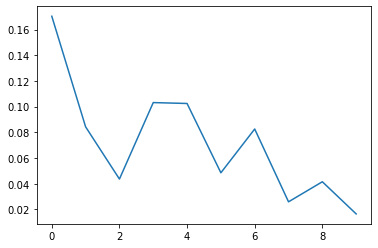

In [60]:
plt.plot(list_loss)

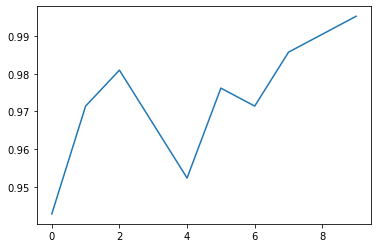

In [61]:
plt.plot(list_acc)

#### 2.5 Predict Validation Data

In [62]:
dataloaders['val'] = torch.utils.data.DataLoader(image_datasets['val'], batch_size=4, shuffle=True, num_workers=4)

In [64]:
val_corrects = 0
for inputs, labels in dataloaders['val']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    loss = criterion(outputs, labels)

    val_corrects += torch.sum(preds == labels.data)

In [65]:
acc = val_corrects / len(image_datasets['val'])

In [67]:
acc.item()

0.800000011920929

#### 2.6 Predict Single Image

In [86]:
!ls ../images/paddy-leaf-dataset/val/tungro

IMG_0904.jpg  IMG_0907.jpg  IMG_0912.jpg  IMG_0916.jpg	IMG_0923.jpg
IMG_0906.jpg  IMG_0911.jpg  IMG_0913.jpg  IMG_0917.jpg	IMG_1028.jpg


In [70]:
from PIL import Image

In [71]:
img = Image.open("../images/paddy-leaf-dataset/val/tungro/IMG_0906.jpg")

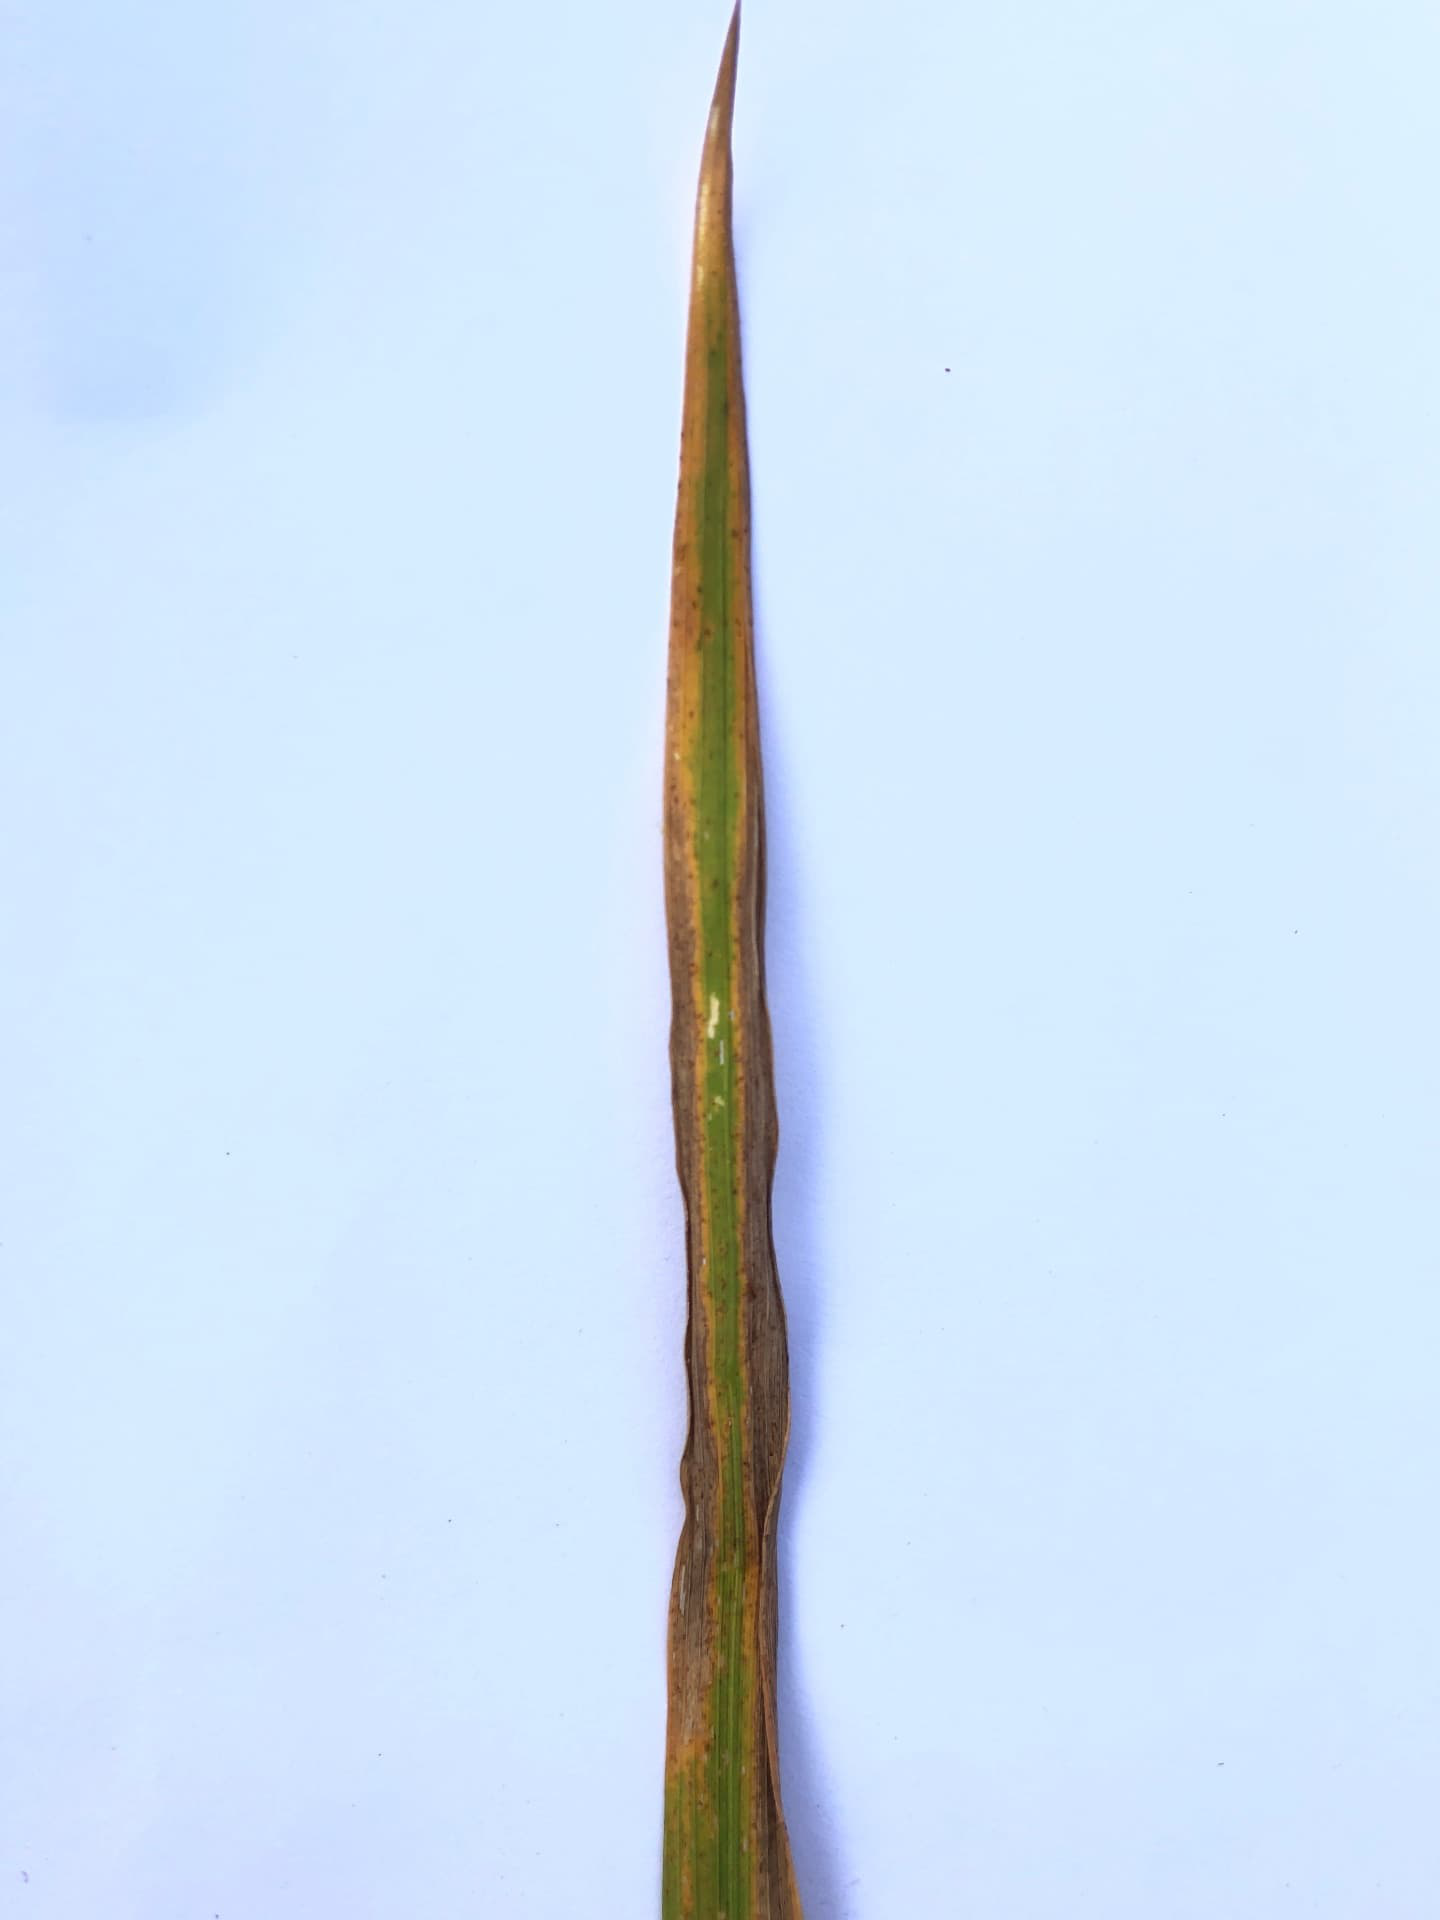

In [72]:
img

In [74]:
img_tensor = data_transforms(img).to(device)

In [78]:
img_tensor.shape

torch.Size([3, 224, 224])

In [79]:
output = model.forward(img_tensor.reshape(1, 3, 224, 224))

In [84]:
output.argmax().item()

2